In [28]:
import random as rd
import math

In [29]:
a = rd.uniform(0, 1)
b = rd.uniform(0, 1)
print(a)
print(b)

0.33590524030232116
0.4835472047260089


In [30]:
## Textbook (4.3) Write the code that generates a normal sample with given μ and σ, 
## and the code that calculates m and s from the sample.
## Step 1: generate a standard normal sample
## Step 2: given the standard normal sample, do a trivial transformation to derive the normal dist sample

## Step 1: generate a standard normal sample
## Follow Box–Muller transformation (Basic form)
## Ref: https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform
def gen_two_uni_values():
    z0 = -1
    z1 = -1
    u1 = rd.uniform(0, 1)
    u2 = rd.uniform(0, 1)
    z0 = math.sqrt(-2*math.log(u1))*math.cos(2*math.pi*u2)
    z1 = math.sqrt(-2*math.log(u1))*math.sin(2*math.pi*u2)
    return (z0, z1)

In [31]:
# Test the above implementation
z0 = -4
z1 = -4
(z0, z1) = gen_two_uni_values()
print(z0)
print(z1)

-1.1528587037313485
-0.2518787341886037


In [32]:
def printData(mTuple):
    for i in mTuple:
        print(i)

In [33]:
## Generate a list of x-values r.t standard normal distribution
mySampleList = []
def gen_std_normal_dist(n):
    my_std_norm_List = []
    for i in range(n):
        mTemp = ()
        mTemp = gen_two_uni_values()
        my_std_norm_List.append(mTemp[0])
        my_std_norm_List.append(mTemp[1])       
    return my_std_norm_List

mySampleList = gen_std_normal_dist(100)

#print(mySampleList)
#printData(mySampleTuple)

In [34]:
## Generate a list of the corresponding pdf 
from scipy.stats import norm
import matplotlib.pyplot as plt
myPDFList = []
for x in mySampleList:
    myPDFList.append(norm.pdf(x))
#print(myPDFList)

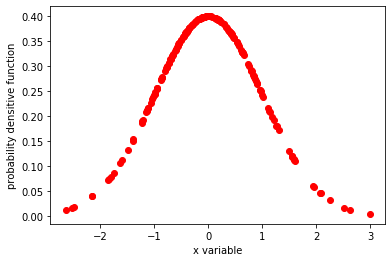

In [35]:
## Draw the bell curve
plt.plot(mySampleList, myPDFList, 'ro')
plt.xlabel('x variable')
plt.ylabel('probability densitive function')
plt.show()

In [48]:
## Step 2: given the standard normal sample, do a trivial transformation to derive the normal dist sample
## Generate a normal sample with given mean and standard deviation
## Ref: https://stats.stackexchange.com/questions/16334/how-to-sample-from-a-normal-distribution-with-known-mean-and-variance-using-a-co
def gen_std_normal(std_norm_List, sample_mean, sample_variance):
    norm_List = []
    for x in std_norm_List:
        x_norm = x*math.sqrt(sample_variance) + sample_mean
        norm_List.append(x_norm)
    return norm_List        

In [49]:
norm_List = []
norm_List = gen_std_normal(mySampleList, 5, 2)

In [51]:
myPDFList = []
for x in norm_List:
    myPDFList.append(norm.pdf(x, 5, math.sqrt(2)))

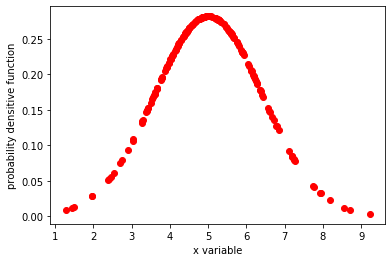

In [52]:
## Draw the bell curve
plt.plot(norm_List, myPDFList, 'ro')
plt.xlabel('x variable')
plt.ylabel('probability densitive function')
plt.show()

In [54]:
import numpy as np 
sample_mean = np.mean(norm_List)  
print("Arithmetic Sample Mean is :", sample_mean) 

Arithmetic Sample Mean is : 4.9521053387928555


In [55]:
sample_s = np.var(norm_List)  
print("Sample standard deviation is :", sample_s)

Sample standard deviation is : 1.8357295226436015


In [ ]:
## Proble 4.1. Write the code that generates a Bernoulli sample with given parameter p, and
## the code that calculates pˆ from the sample.

In [36]:
n = 10
p = 0.3
heads = 0
tails = 0

In [37]:
mysample = []
for i in range(n):
    u = rd.random()
    if u <= p:
        mysample.append(1)
        heads += 1
    else:
        mysample.append(0)
        tails += 1

In [38]:
for x in mysample:
    print(x)

0
0
1
0
0
0
0
0
0
0


In [39]:
p_hat = 0
total = 0
for x in mysample:
    if x == 1:
        total += 1
p_hat = total/len(mysample)
print(p_hat)

0.1


In [40]:
print("In", n, "trials there were", heads, "heads and", tails, "tails")
print("PERCENT HEADS:", 100 * heads/n, "percent" )

In 10 trials there were 1 heads and 9 tails
PERCENT HEADS: 10.0 percent


In [41]:
def generate_Bernoulli_sample(n, p):
    heads = 0
    tails = 0
    mysample = []
    for i in range(n):
        u = rd.random()
        if u <= p:
            mysample.append(1)
            heads += 1
        else:
            mysample.append(0)
            tails += 1
    return (mysample, heads, tails)

In [42]:
heads = 0
tails = 0
mysample = []

In [43]:
(mysample, heads, tails) = generate_Bernoulli_sample(n, p)

In [44]:
for x in mysample:
    print(x)

0
0
1
1
0
1
0
0
1
0


In [45]:
print("In", n, "trials there were", heads, "heads and", tails, "tails")
print("PERCENT HEADS:", 100 * heads/n, "percent" )

In 10 trials there were 4 heads and 6 tails
PERCENT HEADS: 40.0 percent


In [46]:
print(generate_Bernoulli_sample(10000, 0.2))

([0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,

In [47]:
# assert the p_hat not much differnt from the p when the sample is large enough
# central limit theorem